In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import researchpy as rp
import pandas as pd
import numpy as np

In [2]:
data_folder = Path('../data/')
output_folder = Path('../output/')
output_folder.mkdir(parents=True, exist_ok=True)


fn = Path(data_folder, 'assessments.csv')
df = pd.read_csv(fn)

individuals = df[df['AssessmentName'].str.contains('Individuals')].copy()

# Drop any completely empty columns
# e.g. columns that are youth survey-specific and not used for adults
individuals.dropna(axis=1, how='all', inplace=True)

#Convert subscores to an int for math purposes.
for col in [c for c in individuals.columns if c.startswith('CALC_')]:
    individuals[col] = individuals[col].apply(int)

youth = df[df['AssessmentName'].str.contains('Youth')].copy()

# Drop any completely empty columns
# e.g. columns that are adult survey-specific and not used for youth
youth.dropna(axis=1, how='all', inplace=True)

# Convert subscores to an int for math purposes.
for col in [c for c in youth.columns if c.startswith('CALC_')]:
    youth[col] = youth[col].apply(int)

## Analysis: Chi-square tests

**NOTE:** For each year and assessment type, do two chi-square tests: one that compares Black and White people, and another that compares Latino and White people. In addition to individual years, we also perform chi-square tests on data across all years.

In [3]:
chidata = []

years = dict()
for year in df['AssessmentYear'].unique():
    years[year] = [year]
years['Overall'] = df['AssessmentYear'].unique()

for y in years.keys():
    year = years[y]
    for assessment in df['AssessmentName'].unique():
        for group in ['Black', 'Latino']:
            af = df[
                df['AssessmentName'].eq(assessment) & 
                df['AssessmentYear'].isin(year)].copy()
            af['ChiRE'] = df['Race/Ethnicity'].apply(lambda r: r if r in ['White', group] else np.nan)
            af['ChiAcuity'] = df['Acuity'].str.contains('High')
            
            crosstab, test_results, expected = rp.crosstab(af['ChiRE'], af['ChiAcuity'],
                                                       test= "chi-square",
                                                       expected_freqs= True,
                                                       prop= "cell")        
            row = [y, assessment, group]
            row.extend(test_results['results'])
            chidata.append(row)
            
chidf = pd.DataFrame(chidata, columns=['year','assessment','group','pearson chi-square','p-value','cramers phi'])            
chidf['sig'] = chidf['p-value'].lt(0.05)

In [4]:
cf = chidf.sort_values(by=['assessment','group','year']).copy()

fn = Path(output_folder, 'chi-outcomes.csv')
cf.to_csv(fn, index=False)
cf

,year,assessment,group,pearson chi-square,p-value,cramers phi,sig
20,2016,CES for Individuals - CES Survey Part 1,Black,47.5027,0.0000,0.0768,True
0,2017,CES for Individuals - CES Survey Part 1,Black,56.0208,0.0000,0.0680,True
8,2018,CES for Individuals - CES Survey Part 1,Black,145.1486,0.0000,0.0969,True
4,2019,CES for Individuals - CES Survey Part 1,Black,55.6901,0.0000,0.0645,True
16,2020,CES for Individuals - CES Survey Part 1,Black,16.0113,0.0001,0.0381,True
12,2021,CES for Individuals - CES Survey Part 1,Black,45.2605,0.0000,0.0622,True
24,2022,CES for Individuals - CES Survey Part 1,Black,6.5137,0.0107,0.0272,True
28,Overall,CES for Individuals - CES Survey Part 1,Black,376.9853,0.0000,0.0684,True
21,2016,CES for Individuals - CES Survey Part 1,Latino,17.8769,0.0000,0.0581,True
1,2017,CES for Individuals - CES Survey Part 1,Latino,24.6483,0.0000,0.0521,True


## Table: Acuity group distribution by race/ethnicity

In [5]:
acuity_group_folder = Path(output_folder, "acuity_group_distribution")
acuity_group_folder.mkdir(parents=True, exist_ok=True)

acuity_group_distribution_tables = dict()

for assessment in df['AssessmentName'].unique():
    af = df[df['AssessmentName'].eq(assessment)].copy()
    cross_tab_prop = pd.crosstab(af['Race/Ethnicity'], af['Acuity'], normalize='index').mul(100).round(1)
    cross_tab = pd.crosstab(af['Race/Ethnicity'], af['Acuity'])
    
    cross_tab.loc['Overall'] = af.groupby('Acuity').count()['Unique_client_ID']
    
    cross_tab_prop.loc['Overall'] = cross_tab.loc['Overall'].div(cross_tab.loc['Overall'].sum()).mul(100).round(1)
    
    cf = cross_tab.merge(cross_tab_prop, left_index=True, right_index=True,suffixes=(' (count)', " (%)"))
    
    cols = list(cf.columns)
    cols.sort()
    cols.reverse()
    acuity_group_distribution_tables[assessment] = cf[cols].copy()
    
    fn = Path(acuity_group_folder,f'{assessment}.csv')
    acuity_group_distribution_tables[assessment].to_csv(fn)

In [6]:
acuity_group_distribution_tables['CES for Individuals - CES Survey Part 1']#.to_clipboard()

Acuity,3/High Acuity (count),3/High Acuity (%),2/Mid Acuity (count),2/Mid Acuity (%),1/Low Acuity (count),1/Low Acuity (%)
Race/Ethnicity,,,,,,
Asian,466,24.5,1245,65.4,193,10.1
Black,12997,25.7,32297,63.8,5356,10.6
Latino,10503,28.0,24133,64.4,2812,7.5
Other,985,27.5,2313,64.6,283,7.9
Unknown,935,23.5,2683,67.4,364,9.1
White,9567,32.0,18556,62.1,1754,5.9
Overall,35453,27.8,81227,63.7,10762,8.4


In [7]:
acuity_group_distribution_tables['CES for Youth - Next Step Tool']#.to_clipboard()

Acuity,3/High Acuity (count),3/High Acuity (%),2/Mid Acuity (count),2/Mid Acuity (%),1/Low Acuity (count),1/Low Acuity (%)
Race/Ethnicity,,,,,,
Asian,44,36.1,58,47.5,20,16.4
Black,2312,41.3,2508,44.8,782,14.0
Latino,2027,46.1,1860,42.3,513,11.7
Other,266,53.2,185,37.0,49,9.8
Unknown,201,42.2,200,42.0,75,15.8
White,765,55.1,499,35.9,125,9.0
Overall,5615,45.0,5310,42.5,1564,12.5


## Chart: high acuity frequency over time

In [8]:
high_acuity_freq_folder = Path(output_folder, "high_acuity_freq")
high_acuity_freq_folder.mkdir(parents=True, exist_ok=True)

high_acuity_freq_charts = dict()

for assessment in df['AssessmentName'].unique():
    yf = pd.DataFrame()
    for year in df['AssessmentYear'].unique():
        af = df[df['AssessmentName'].eq(assessment) & df['AssessmentYear'].eq(year)].copy()
        cross_tab_prop = pd.crosstab(af['Race/Ethnicity'], af['Acuity'], normalize='index').mul(100).round(1)   
        yf[year] = cross_tab_prop['3/High Acuity'].copy()
    high_acuity_freq_charts[assessment] = yf[range(2016, 2023)]
    
    fn = Path(high_acuity_freq_folder, f'{assessment}.csv')
    high_acuity_freq_charts[assessment].to_csv(fn)

In [9]:
high_acuity_freq_charts['CES for Individuals - CES Survey Part 1']

,2016,2017,2018,2019,2020,2021,2022
Race/Ethnicity,,,,,,,
Asian,14.0,11.2,22.0,26.0,32.6,32.7,29.3
Black,11.9,15.0,21.4,29.1,38.1,32.8,32.3
Latino,13.3,16.3,21.5,30.3,37.7,34.8,32.9
Other,10.5,17.6,26.4,32.3,39.7,30.1,35.2
Unknown,12.6,19.1,22.4,20.2,35.6,29.8,32.7
White,17.5,20.3,30.1,35.3,42.0,38.8,34.9


In [10]:
high_acuity_freq_charts['CES for Youth - Next Step Tool']

,2016,2017,2018,2019,2020,2021,2022
Race/Ethnicity,,,,,,,
Asian,50.0,21.1,30.8,36.0,40.0,35.3,66.7
Black,30.3,23.1,38.8,45.1,51.0,45.5,48.6
Latino,40.2,29.5,40.0,48.9,54.9,56.2,56.0
Other,47.6,33.3,56.7,52.9,57.1,56.5,69.2
Unknown,42.6,34.1,30.4,47.9,47.8,47.7,43.4
White,44.3,41.7,47.4,61.1,60.4,67.1,69.3


## Chart: subscores

In [11]:
subscore_folder = Path(output_folder, "subscore_frequency")
subscore_folder.mkdir(parents=True, exist_ok=True)

subscore_charts = dict()

for assessment in df['AssessmentName'].unique(): 
    af = df[df['AssessmentName'].eq(assessment)].copy()
    af = af.dropna(how='all', axis=1).copy()
    
    subscores = [c for c in af.columns if c.startswith('CALC_') and not c.endswith('_SCORE')]
    subscores.append('GENERAL_SUB_SCORE')
    
    for subscore in subscores:
        af[subscore] = af[subscore].apply(int)
    
    rates = af[
        af['Race/Ethnicity'].isin(['Black','Latino', 'White'])
    ].groupby('Race/Ethnicity')[subscores].mean().T
    
    subscore_charts[assessment] = rates.mul(100).round(1).sort_values(by='Black').copy()
    
    fn = Path(subscore_folder, f'{assessment}.csv')
    subscore_charts[assessment].to_csv(fn)

In [12]:
subscore_charts['CES for Individuals - CES Survey Part 1']

Race/Ethnicity,Black,Latino,White
CALC_WELLNESS_TRIMORBIDITY,17.6,21.7,24.1
GENERAL_SUB_SCORE,19.7,13.9,21.8
CALC_WELLNESS_SUBSTANCE_USE,23.9,34.1,34.4
CALC_RISKS_LEGAL_ISSUES,28.6,35.1,35.3
CALC_WELLNESS_MEDICATIONS,35.1,34.5,40.4
CALC_SOCIALIZATION_SELFCARE,39.9,40.3,44.3
CALC_RISKS_RISK_OF_EXPLOITATION,45.9,46.9,50.9
CALC_WELLNESS_MENTAL_HEALTH,49.3,50.8,56.5
CALC_RISKS_EMERGENCY_SERVICE_USE,56.3,58.1,63.3
CALC_RISKS_RISK_OF_HARM,59.0,60.6,63.5


In [13]:
subscore_charts['CES for Youth - Next Step Tool']

Race/Ethnicity,Black,Latino,White
GENERAL_SUB_SCORE,1.8,3.2,2.3
CALC_WELLNESS_TRIMORBIDITY,9.8,13.3,17.4
CALC_WELLNESS_MEDICATIONS,18.9,21.1,29.7
CALC_WELLNESS_SUBSTANCE_USE,26.7,38.2,39.6
CALC_SOCIALIZATION_SELFCARE,29.1,25.9,27.4
CALC_RISKS_RISK_OF_EXPLOITATION,30.0,32.9,42.4
CALC_WELLNESS_MENTAL_HEALTH,30.3,33.1,45.3
CALC_RISKS_LEGAL_ISSUES,33.8,41.0,37.1
CALC_RISKS_EMERGENCY_SERVICE_USE,35.7,35.7,44.7
CALC_SOCIALIZATION_MEANINGFUL_DAILY_ACTIVITY,38.8,37.2,39.1


## Chart: Acuity score distribution by race

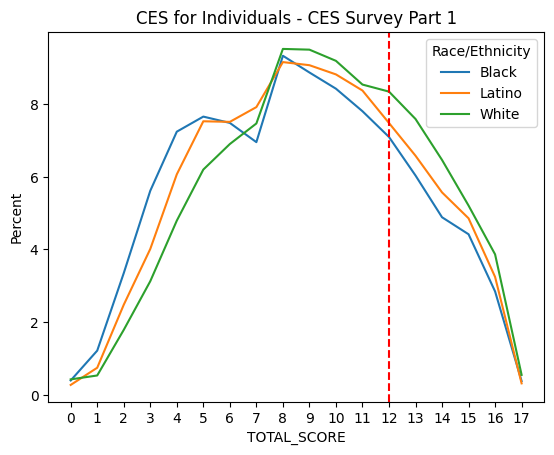

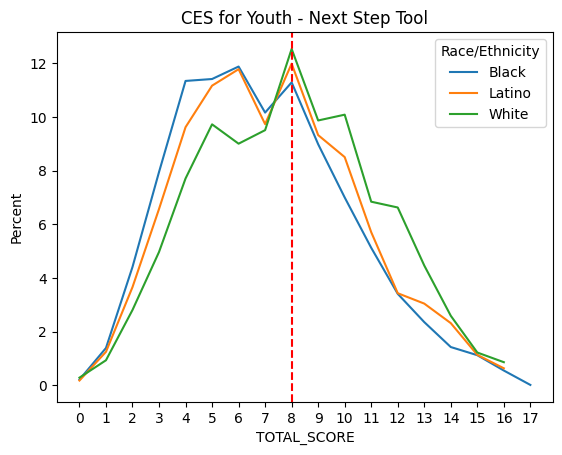

In [14]:
score_dist_folder = Path(output_folder, "score_distribution")
score_dist_folder.mkdir(parents=True, exist_ok=True)

score_dist_charts = dict()

for assessment in df['AssessmentName'].unique(): 
    af = df[df['AssessmentName'].eq(assessment)].copy()
    
    score_dist = af[
        af['Race/Ethnicity'].isin(['Black','White','Latino'])
    ].groupby(['TOTAL_SCORE','Race/Ethnicity'])['Unique_client_ID'].count().unstack().copy()
    
    score_dist_charts[assessment] = score_dist.div(score_dist.sum()).mul(100)
    
    fn = Path(score_dist_folder, f'{assessment}.csv')
    score_dist_charts[assessment].to_csv(fn)
    
    # Plot for context
    score_dist_charts[assessment].plot(title=assessment, ylabel='Percent')
    high_cutoff = af[af['Acuity'].str.contains('High')]['TOTAL_SCORE'].min()
    plt.xticks(np.arange(0, int(af['TOTAL_SCORE'].max()) + 1, step=1)) 
    plt.axvline(high_cutoff, color='red', linestyle = '--') # theoretical 
pass

## Chart: Rate of people matched, but in yet in, permanent housing by race and score

In [15]:
for i in df['Intervention'].unique():
    df[i] = df['Intervention'].eq(i)

"Matched to Permanent Housing, Not Yet Housed",False,True,Total,pct,pctref
TOTAL_SCORE,,,,,
0,363,4,367,0.010899,1.1
1,852,15,867,0.017301,1.7
2,2387,47,2434,0.019310,1.9
3,3819,102,3921,0.026014,2.6
4,5144,137,5281,0.025942,2.6
5,5663,201,5864,0.034277,3.4
6,5454,240,5694,0.042150,4.2
7,5325,271,5596,0.048427,4.8
8,6475,405,6880,0.058866,5.9


"Matched to Permanent Housing, Not Yet Housed",False,True,Total,pct,pctref
TOTAL_SCORE,,,,,
0,18,1,19,0.052632,5.3
1,98,5,103,0.048544,4.9
2,304,12,316,0.037975,3.8
3,555,23,578,0.039792,4.0
4,780,39,819,0.047619,4.8
5,855,55,910,0.060440,6.0
6,835,50,885,0.056497,5.6
7,703,67,770,0.087013,8.7
8,817,91,908,0.100220,10.0


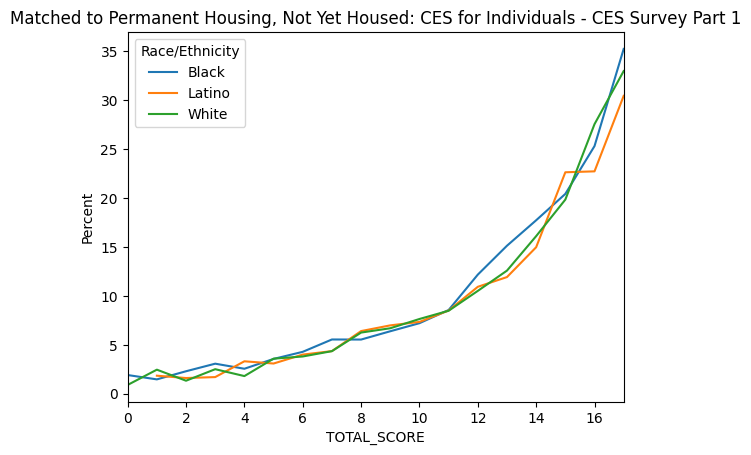

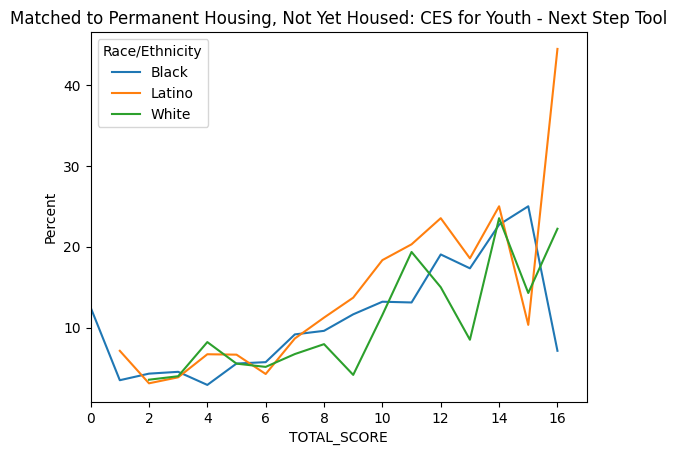

In [19]:
matched_rate_folder = Path(output_folder, "matched_rate")
matched_rate_folder.mkdir(parents=True, exist_ok=True)

perm_charts = dict()
perm_overall_chart = dict()
for assessment in df['AssessmentName'].unique():
    intervention = 'Matched to Permanent Housing, Not Yet Housed'
    filters = df['AssessmentName'].eq(assessment) & \
              df['AssessmentPredatesIntervention']
    re = ['Black', 'White', 'Latino']
    
    permdf = df[filters & df['Race/Ethnicity'].isin(re)].groupby(['TOTAL_SCORE','Race/Ethnicity',intervention]).count()['Unique_client_ID'].unstack()
    permdf['Total'] = permdf.sum(axis=1)
    permdf['pct'] = permdf[True].div(permdf['Total'])

    perm_charts[assessment] = permdf['pct'].mul(100).copy()

    fn = Path(matched_rate_folder, f'{assessment}.csv')
    perm_charts[assessment].to_csv(fn)
    
    # Overall numbers
    permoveralldf = df[filters].groupby(['TOTAL_SCORE', intervention]).count()['Unique_client_ID'].unstack()
    permoveralldf['Total'] = permoveralldf.sum(axis=1)
    permoveralldf['pct'] = permoveralldf[True].div(permoveralldf['Total'])
    permoveralldf['pctref'] = permoveralldf['pct'].mul(100).round(1)
    display(permoveralldf)
    
    # Plot for context
    perm_charts[assessment].unstack().plot(xlim=(0,17),title=f'{intervention}: {assessment}', ylabel="Percent")
pass   

## Chart: 2021 Youth Acuity Group Breakdown

In [18]:
af = df[
    df['AssessmentName'].str.contains('Youth') & 
    df['Race/Ethnicity'].isin(['Black','White','Latino']) &
    df['AssessmentYear'].eq(2021)
].copy()

cross_tab_prop = pd.crosstab(af['Race/Ethnicity'], af['Acuity'], normalize='index').mul(100).round(1)

cols = list(cross_tab_prop.columns)
cols.reverse()

display(cross_tab_prop[cols])

cross_tab_prop[cols].to_csv(Path(output_folder, '2021-youth-acuity-breakdown.csv'))

Acuity,3/High Acuity,2/Mid Acuity,1/Low Acuity
Race/Ethnicity,,,
Black,45.5,45.8,8.8
Latino,56.2,36.6,7.3
White,67.1,27.6,5.3
